<div style='float:left'>
<img style="-webkit-user-select: none" src="https://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/marca_UOC_web.jpg">
<h1>
B2.332-A7 RamdomForest.R_Random Forest
</h1>

## Descripción:

### En este ejemplo se muestra como generar un clasificador arbol de decisión y como mejorarlo con la técnica de Random Forest

## Procedimiento:

### Instalar los packages necesarios en caso de no haberlo hecho anteriormente

In [24]:
if(!require(rpart)){
    install.packages('rpart',repos='http://cran.es.r-project.org')
    require(rpart)
}
if(!require(caret)){
    install.packages('caret',repos='http://cran.es.r-project.org')
    require(caret)
}
if(!require(randomForest)){
    install.packages('caret',repos='http://cran.es.r-project.org')
    require(caret)
}
set.seed(17)

### Carga de los datos. 

In [25]:
wdbc=read.table(  url("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"), 
  sep=",", header=FALSE)
dim(wdbc)
dataset <- wdbc[,(2:32)]

[1] 569  32

### Parámetros de creación del modelo

In [26]:
# Paso de kfolds
control <- trainControl(method="repeatedcv", number=10, repeats=3, savePredictions = TRUE)
# Metrica de calidad % instancias correctas sobre total
metric <- "Accuracy"

### Creamos un primer modelo de árbol.

In [27]:
model.cart<-train(V2~.,data=dataset,method="rpart", metric=metric,trControl=control)

### Matriz de confusión

In [28]:
confusionMatrix(model.cart)

Cross-Validated (10 fold, repeated 3 times) Confusion Matrix 

(entries are percentual average cell counts across resamples)
 
          Reference
Prediction    B    M
         B 59.2  3.6
         M  3.5 33.6
                            
 Accuracy (average) : 0.9285


###  Mostramos todas sus características.

CART 

569 samples
 30 predictor
  2 classes: 'B', 'M' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 512, 511, 512, 512, 513, 512, ... 
Resampling results across tuning parameters:

  cp           Accuracy   Kappa    
  0.004716981  0.9284296  0.8463765
  0.049528302  0.9103092  0.8092447
  0.792452830  0.7855479  0.4623542

Accuracy was used to select the optimal model using  the largest value.
The final value used for the model was cp = 0.004716981. 


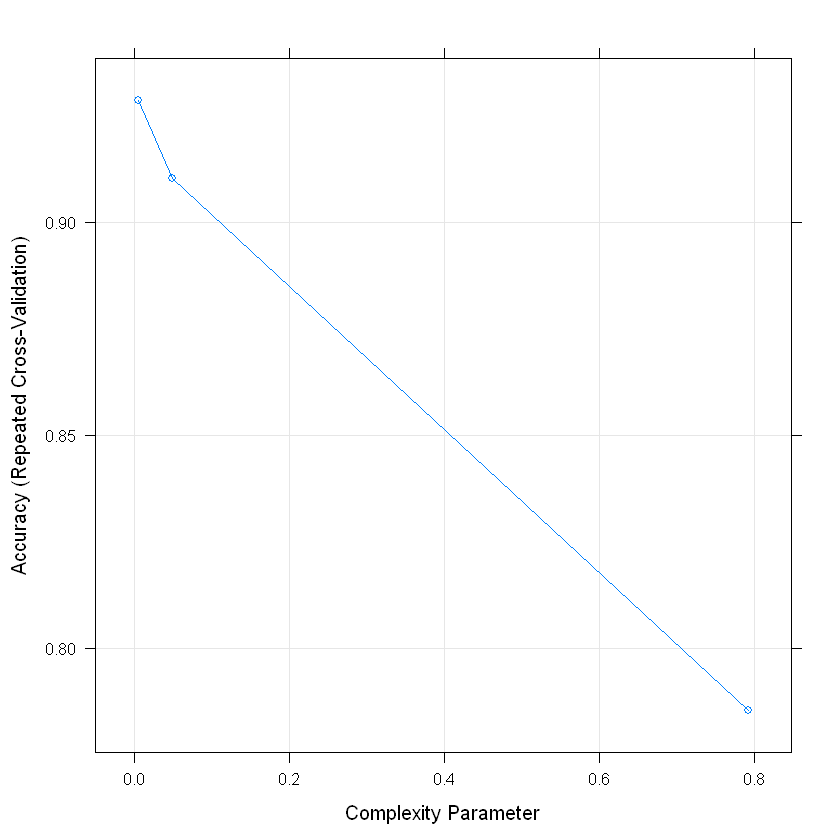

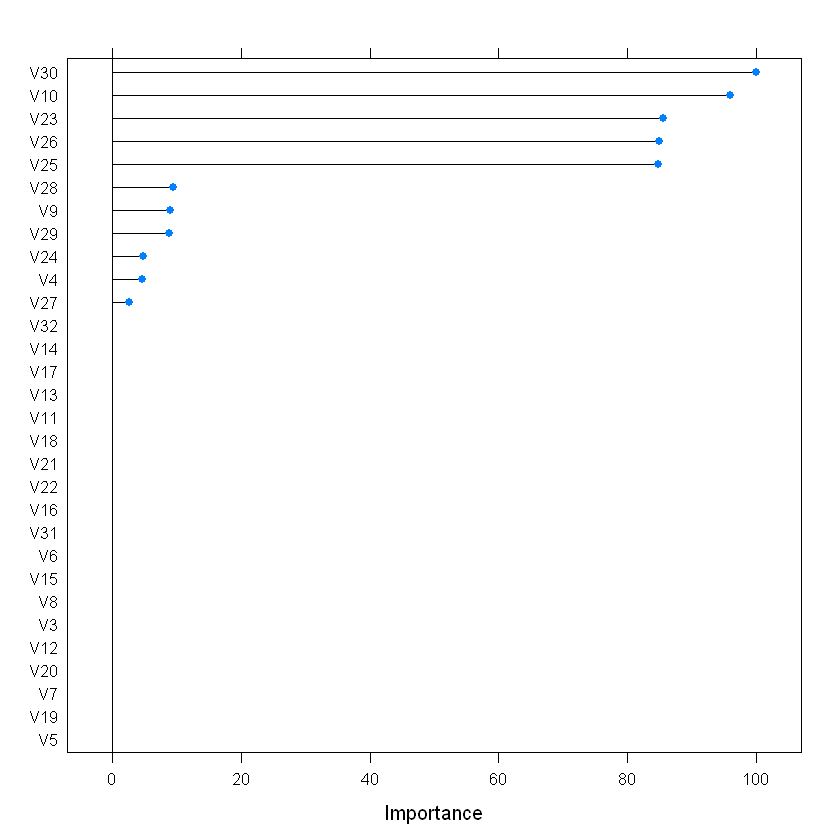

In [29]:
print(model.cart)
plot(model.cart)
ctreeVarImp = varImp(model.cart)
plot(ctreeVarImp)

### Creación de un árbol con el método Random Forest

In [30]:
 model.rf <- train(V2~., data=dataset, method="rf",metric=metric, trControl=control)

### Matriz de confusión

In [31]:
confusionMatrix(model.rf)

Cross-Validated (10 fold, repeated 3 times) Confusion Matrix 

(entries are percentual average cell counts across resamples)
 
          Reference
Prediction    B    M
         B 61.5  1.9
         M  1.3 35.3
                            
 Accuracy (average) : 0.9678


###  Mostramos todas sus características.

Random Forest 

569 samples
 30 predictor
  2 classes: 'B', 'M' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 513, 513, 512, 512, 512, 512, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   2    0.9584936  0.9103782
  16    0.9677693  0.9308537
  30    0.9625465  0.9195944

Accuracy was used to select the optimal model using  the largest value.
The final value used for the model was mtry = 16. 


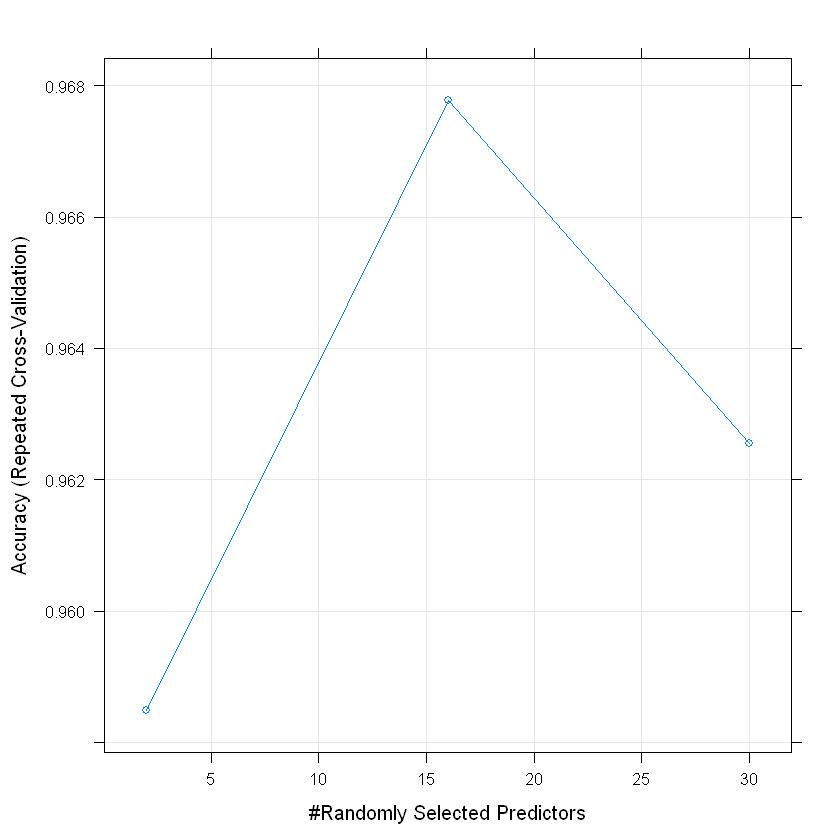

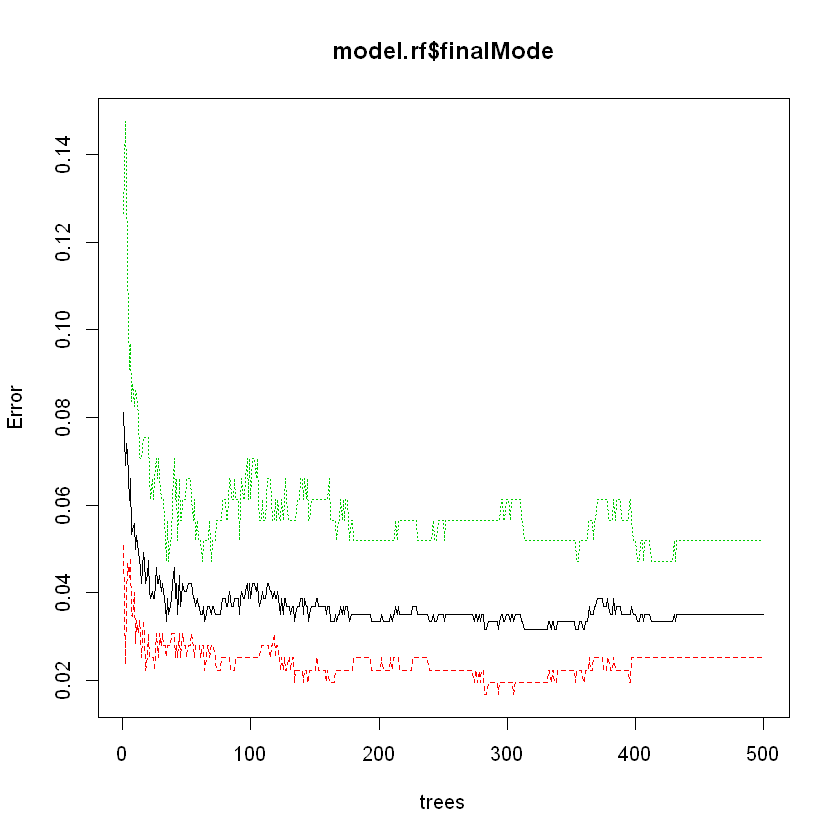

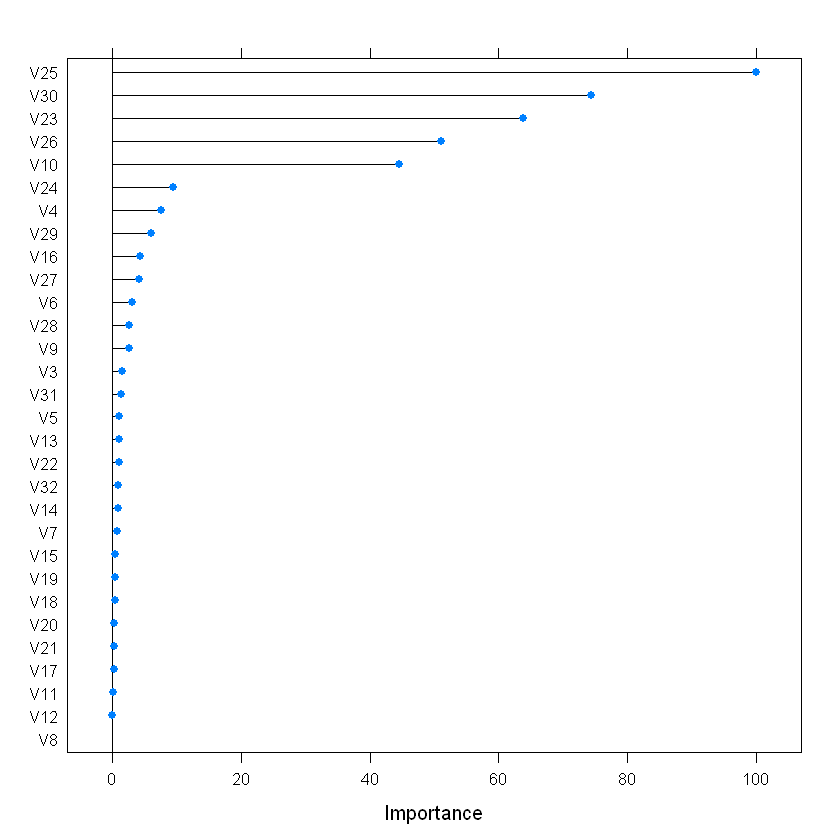

In [32]:
print(model.rf)
plot(model.rf)
plot(model.rf$finalMode)
ctreeVarImp = varImp(model.rf)
plot(ctreeVarImp)

### Sumarizamos y comparamos los datos de ambos modelos


Call:
summary.resamples(object = rf_results)

Models: rf, cart 
Number of resamples: 30 

Accuracy 
       Min. 1st Qu. Median   Mean 3rd Qu. Max. NA's
rf   0.9138  0.9474 0.9652 0.9678  0.9825    1    0
cart 0.8571  0.9123 0.9298 0.9284  0.9474    1    0

Kappa 
       Min. 1st Qu. Median   Mean 3rd Qu. Max. NA's
rf   0.8153  0.8873 0.9250 0.9309  0.9619    1    0
cart 0.6832  0.8143 0.8501 0.8464  0.8875    1    0


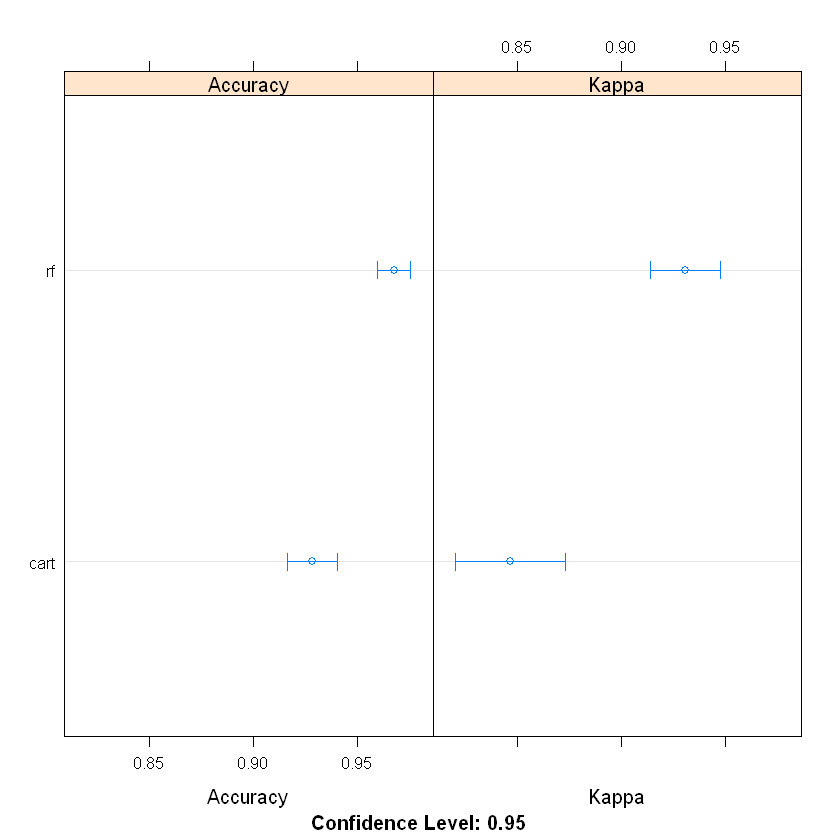

In [33]:
rf_results <- resamples(list(rf=model.rf, cart=model.cart))
summary(rf_results)
dotplot(rf_results)